# Linear Regression
## Day 1 - ML Workshop
---

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston = load_boston()

## Assignment
---
1. Linear regression in 2 variables: y = ax1 + bx2 + c (preferably best 2 vars)
2. Plot hyperplane in matplotlib
3. (Optional) Plot LSTAT vs RM and check if they vary linearly

In [34]:
# X = No. of rooms
X1 = df['RM']
X2 = df['LSTAT']

# Y = Target
Y = df['TAR']

In [35]:
# normalize data
X1 = (X1 - X1.min()) / (X1.max() - X1.min())
X2 = (X2 - X2.min()) / (X2.max() - X2.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())

# dataframes to np arrays
X1 = X1.values
X2 = X2.values
Y = Y.values

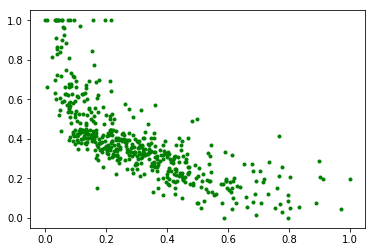

In [37]:
plt.plot(X2, Y, 'g.')

In [25]:
from sklearn.model_selection import train_test_split

In [38]:
x1train, x1test, x2train, x2test, ytrain, ytest = train_test_split(X1, X2, Y, test_size=0.2)

In [39]:
'x1train: ', len(x1train), 'x1test: ', len(x2test), 'x2train: ', len(x2train), 'x2test: ', len(x2test), 'ytrain: ', len(ytrain), 'ytest: ', len(ytest)

('x1train: ',
 404,
 'x1test: ',
 102,
 'x2train: ',
 404,
 'x2test: ',
 102,
 'ytrain: ',
 404,
 'ytest: ',
 102)

In [40]:
def h(a, x1, b, x2, c):
    return (a * x1) + (b * x2) + c

In [41]:
def error(a, x1, b, x2, c, t):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power(h(a, x1[i], b, x2[i], c) - t[i], 2)
        
    return e / (2 * m)

In [47]:
def stepGradient(a, x1, b, x2, c, t, learningRate):
    gradA, gradB, gradC = 0, 0, 0
    m = len(x1)
    for i in range(m):
        gradA += 2 * (h(a, x1[i], b, x2[i], c) - t[i]) * x1[i]
        gradB += 2 * (h(a, x1[i], b, x2[i], c) - t[i]) * x2[i]
        gradC += 2 * (h(a, x1[i], b, x2[i], c) - t[i])
        
    a -= gradA * learningRate
    b -= gradB * learningRate
    c -= gradC * learningRate
    
    return a, b, c

In [48]:
def descend(initA, x1, initB, x2, initC, t, learningRate, steps):
    a, b, c = initA, initB, initC
    for i in range(steps):
        a, b, c = stepGradient(a, x1, b, x2, c, t, learningRate)
        if i%1000 == 0:
            print(f"Error: {error(a, x1, b, x2, c, t)}, a: {a}, b: {b}, c: {c}")
    return a, b, c

In [49]:
initA, initB, initC = 0, 0, 0
learningRate = 0.001
steps = 10000

In [51]:
finalA, finalB, finalC = descend(initA, x1train, initB, x2train, initC, ytrain, learningRate, steps)

Error: 0.019658640104583375, a: 0.16968038236358599, b: 0.0715382033357862, c: 0.3032266666666665
Error: 0.007383444263459735, a: 0.5173134282162682, b: -0.5496400949525493, c: 0.2804914039621381
Error: 0.007383444216664147, a: 0.5174010307694246, b: -0.5495952072496958, c: 0.28043186716021257
Error: 0.007383444216663622, a: 0.517401326220756, b: -0.5495950558599123, c: 0.2804316663643824
Error: 0.007383444216663613, a: 0.5174013272172049, b: -0.5495950553493301, c: 0.2804316656871717
Error: 0.007383444216663618, a: 0.5174013272205653, b: -0.5495950553476088, c: 0.28043166568488803
Error: 0.007383444216663617, a: 0.5174013272205675, b: -0.5495950553476077, c: 0.28043166568488653
Error: 0.007383444216663617, a: 0.5174013272205675, b: -0.5495950553476077, c: 0.28043166568488653
Error: 0.007383444216663617, a: 0.5174013272205675, b: -0.5495950553476077, c: 0.28043166568488653
Error: 0.007383444216663617, a: 0.5174013272205675, b: -0.5495950553476077, c: 0.28043166568488653


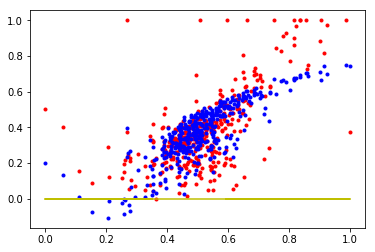

In [64]:
plt.plot(
    x1train, ytrain, 'r.',
    x1train, h(finalA, x1train, finalB, x2train, finalC), 'b.',
    x1train, h(initA, x1train, initB, x2train, initC), 'y'
)

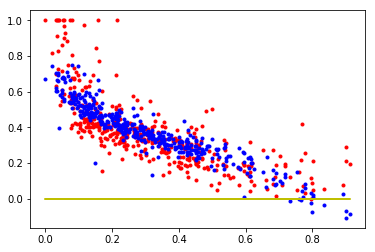

In [65]:
plt.plot(
    x2train, ytrain, 'r.',
    x2train, h(finalA, x1train, finalB, x2train, finalC), 'b.',
    x2train, h(initA, x1train, initB, x2train, initC), 'y'
)

In [58]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'Y')

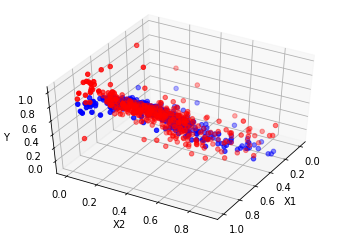

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,30)

ax.scatter(x1train, x2train, ytrain, c='r')
ax.scatter(x1train, x2train, h(finalA, x1train, finalB, x2train, finalC), c='b');

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

In [95]:
trainError = error(finalA, x1train, finalB, x2train, finalC, ytrain)

In [96]:
testError = error(finalA, x1test, finalB, x2test, finalC, ytest)